In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../MNIST_data', validation_size=0)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


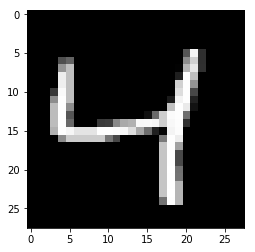

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [62]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
# 28x28x1
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# 4x4x16

### Decoder
# 4x4x16
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
# 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [63]:
epochs = 50
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))

        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)

        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,targets_: imgs})

    print("Epoch: {}/{}...".format(e+1, epochs),"Training loss: {:.4f}".format(batch_cost))
# don't closed the session after training
# because we need to test

Epoch: 1/50... Training loss: 0.1574
Epoch: 2/50... Training loss: 0.1406
Epoch: 3/50... Training loss: 0.1292
Epoch: 4/50... Training loss: 0.1254
Epoch: 5/50... Training loss: 0.1170
Epoch: 6/50... Training loss: 0.1199
Epoch: 7/50... Training loss: 0.1139
Epoch: 8/50... Training loss: 0.1163
Epoch: 9/50... Training loss: 0.1143
Epoch: 10/50... Training loss: 0.1087
Epoch: 11/50... Training loss: 0.1109
Epoch: 12/50... Training loss: 0.1094
Epoch: 13/50... Training loss: 0.1136
Epoch: 14/50... Training loss: 0.1086
Epoch: 15/50... Training loss: 0.1085
Epoch: 16/50... Training loss: 0.1065
Epoch: 17/50... Training loss: 0.1086
Epoch: 18/50... Training loss: 0.1074
Epoch: 19/50... Training loss: 0.1061
Epoch: 20/50... Training loss: 0.1049
Epoch: 21/50... Training loss: 0.1056
Epoch: 22/50... Training loss: 0.1056
Epoch: 23/50... Training loss: 0.1025
Epoch: 24/50... Training loss: 0.1056
Epoch: 25/50... Training loss: 0.1042
Epoch: 26/50... Training loss: 0.1032
Epoch: 27/50... Train

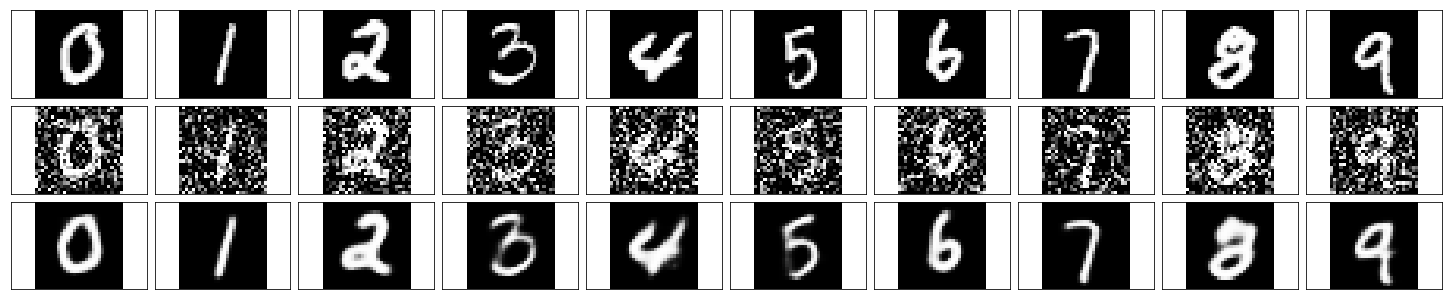

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
test_index = [random.sample(list(np.where(mnist.test.labels==i)[0]),1)[0] for i in range(10)]
in_imgs = mnist.test.images[test_index]
noisy_imgs = in_imgs + 1*noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)
plt.savefig('denoising.png')

In [35]:
h = [random.sample(list(np.where(mnist.test.labels==i)[0]),1)[0] for i in range(10)]

In [36]:
h

[8772, 2880, 4127, 8201, 3029, 5339, 8644, 9328, 9496, 8920]